In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [3]:
# import libraries
import pandas as pd
import numpy as np
import tensorflow as tf

# Reading the data set


In [4]:
train = pd.read_csv('/kaggle/input/titanic/train.csv')
test = pd.read_csv('/kaggle/input/titanic/test.csv')
train_length = len(train)
pid = test['PassengerId']

In [5]:
df = pd.concat([train,test], axis = 0)

In [7]:
df.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
178,1070,NaN,2,"Becker, Mrs. Allen Oliver (Nellie E Baumgardner)",female,36.0,0,3,230136,39.0000,F4,S
113,1005,NaN,3,"Buckley, Miss. Katherine",female,18.5,0,0,329944,7.2833,NaN,Q
356,1248,NaN,1,"Brown, Mrs. John Murray (Caroline Lane Lamson)",female,59.0,2,0,11769,51.4792,C101,S
346,1238,NaN,2,"Botsford, Mr. William Hull",male,26.0,0,0,237670,13.0000,NaN,S
191,1083,NaN,1,"Salomon, Mr. Abraham L",male,NaN,0,0,111163,26.0000,NaN,S


# Exploratory Data Analysis

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import StratifiedKFold

<AxesSubplot: xlabel='Pclass', ylabel='Age'>

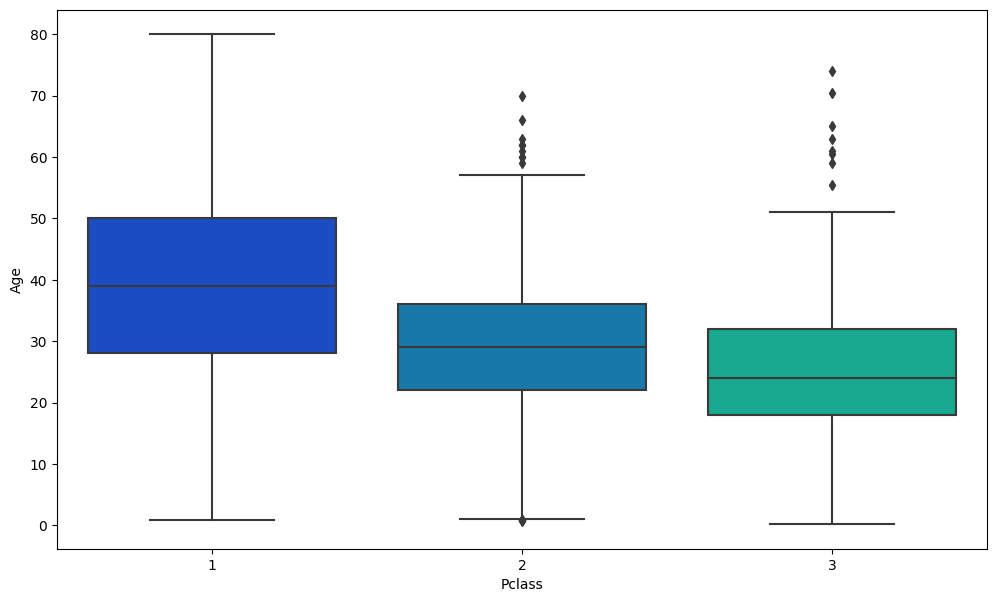

In [9]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='Pclass',y='Age',data=df,palette='winter')

<AxesSubplot: xlabel='Pclass', ylabel='count'>

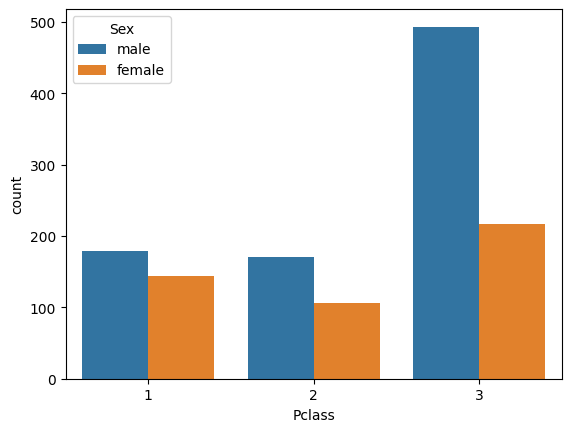

In [10]:
sns.countplot(x='Pclass', data = df,hue='Sex')

# Feature Engineering

In [11]:
# null values 
# this is a concatenated dataframe hence all the suvived values from test set are Nan
df.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

In [12]:
# filling the missing ages
df.loc[df['Age'].isnull(),'Age'] = 37
df.loc[(df['Age'].isnull()) & (df['Pclass'] == 2), 'Age'] = 29
df.loc[(df['Age'].isnull()) & (df['Pclass'] == 3), 'Age'] = 24

In [13]:
df['Age'].isnull().any()

False

In [14]:
#creating new feature 'Familysize'
df['FamilySize'] = df['SibSp'] + df['Parch']+1

In [15]:
#finding the nan in Fare feature and replacing it with its mean
df.loc[df['Fare'].isnull(), 'Fare'] = df['Fare'].mean()

In [16]:
#creating a new feature 'Fare Per Person' 
df['FarePerPerson'] = df['Fare'] / df['FamilySize']

In [17]:
# creating a new feature 'Title'
df['Title'] = df['Name'].str.extract(' ([A-Za-z]+)\.', expand = False)

In [18]:
df['Title'] = df['Title'].replace({'Mme' : 'Mrs', 'Ms' : 'Miss', 'Mlle' : 'Miss', 'Master' : 'Mr'})

In [19]:
df['Title'] = df['Title'].replace(['Dona','Countess', 'Dr', 'Lady', 'Dr', 'Rev', 'Col', 'Major', 'Capt', 'Don', 'Jonkheer', 'Sir'], 'Rare')

In [20]:
df['Title'].value_counts()

Mr      818
Miss    264
Mrs     198
Rare     29
Name: Title, dtype: int64

In [21]:
df.sample(4)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,FarePerPerson,Title
332,333,0.0,1,"Graham, Mr. George Edward",male,38.0,0,1,PC 17582,153.4625,C91,S,2,76.73125,Mr
443,444,1.0,2,"Reynaldo, Ms. Encarnacion",female,28.0,0,0,230434,13.0000,NaN,S,1,13.00000,Miss
403,404,0.0,3,"Hakkarainen, Mr. Pekka Pietari",male,28.0,1,0,STON/O2. 3101279,15.8500,NaN,S,2,7.92500,Mr
415,416,0.0,3,"Meek, Mrs. Thomas (Annie Louise Rowley)",female,37.0,0,0,343095,8.0500,NaN,S,1,8.05000,Mrs


# Data Preprocessing

In [22]:
df2 = df.corr()

making a correalation heatmap to see which columns are not needed

<AxesSubplot: >

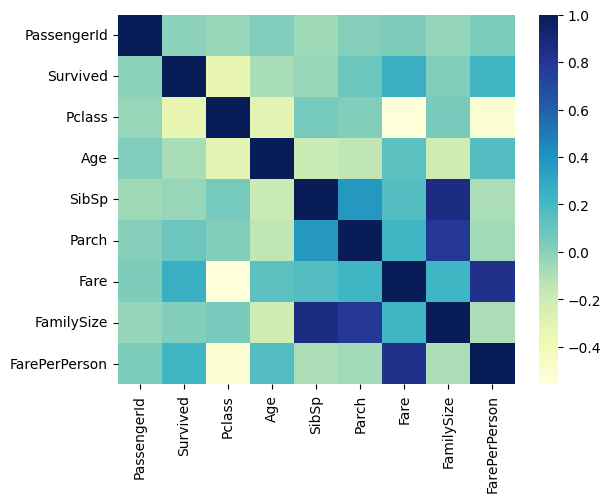

In [23]:
sns.heatmap(df2,cmap='YlGnBu')

In [24]:
df.drop(['Name','Fare','SibSp','Parch','PassengerId','Cabin','Ticket'],axis=1,inplace=True)


In [25]:
df.isnull().sum()

Survived         418
Pclass             0
Sex                0
Age                0
Embarked           2
FamilySize         0
FarePerPerson      0
Title              0
dtype: int64

In [26]:
df.head(2)

,Survived,Pclass,Sex,Age,Embarked,FamilySize,FarePerPerson,Title
0,0.0,3,male,22.0,S,2,3.62500,Mr
1,1.0,1,female,38.0,C,2,35.64165,Mrs


lets split the data again into train and test set

Biforcating the merged data frame again

In [27]:
train = df[:train_length]
print(train.shape)

(891, 8)


In [28]:
test = df[train_length:]
print(test.shape)

(418, 8)


In [29]:
# Removing the survived column from test dataframe
test.drop('Survived',axis=1,inplace=True)

In [30]:
train.head(2)

,Survived,Pclass,Sex,Age,Embarked,FamilySize,FarePerPerson,Title
0,0.0,3,male,22.0,S,2,3.62500,Mr
1,1.0,1,female,38.0,C,2,35.64165,Mrs


In [32]:
#we know there are two null values in  train data set
train.dropna(inplace=True)

In [33]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Survived       889 non-null    float64
 1   Pclass         889 non-null    int64  
 2   Sex            889 non-null    object 
 3   Age            889 non-null    float64
 4   Embarked       889 non-null    object 
 5   FamilySize     889 non-null    int64  
 6   FarePerPerson  889 non-null    float64
 7   Title          889 non-null    object 
dtypes: float64(3), int64(2), object(3)
memory usage: 62.5+ KB


In [34]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 0 to 417
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Pclass         418 non-null    int64  
 1   Sex            418 non-null    object 
 2   Age            418 non-null    float64
 3   Embarked       418 non-null    object 
 4   FamilySize     418 non-null    int64  
 5   FarePerPerson  418 non-null    float64
 6   Title          418 non-null    object 
dtypes: float64(2), int64(2), object(3)
memory usage: 26.1+ KB


In [35]:
oe = OrdinalEncoder()
sc = StandardScaler()

In [36]:
#creating a simple function to apply ordinal encoding to both train and test data
data = [train,test]
for x in data:
    a = x['Sex'].values
    b = x['Embarked'].values
    c = x['Title'].values
    a = np.reshape(a, (-1,1))
    b = np.reshape(b, (-1,1))
    c = np.reshape(c,(-1,1))
    x['Sex'] = oe.fit_transform(a)
    x['Embarked'] = oe.fit_transform(b)
    x['Title'] = oe.fit_transform(c)

In [37]:
train.columns.to_list()

['Survived',
 'Pclass',
 'Sex',
 'Age',
 'Embarked',
 'FamilySize',
 'FarePerPerson',
 'Title']

In [38]:
data = [train,test]

In [39]:
#Scaling the data for better of performence of the algorithems

for x in data:
    x[['Pclass','Sex','Age',
       'Embarked','FamilySize',
       'FarePerPerson','Title']] = sc.fit_transform(x[['Pclass','Sex','Age',
                                                        'Embarked','FamilySize',
                                                        'FarePerPerson','Title']])

# Applying KFold Crossvalidation and other Data Modelling operations

In [40]:
kf = StratifiedKFold(n_splits=4, shuffle=True, random_state=10)

In [41]:
X = train.drop('Survived', axis = 1)
y = train['Survived']

In [42]:
#simple function to get the scores from various models

def get_score (model, X_train, X_test, y_train, y_test):
    model.fit(X_train,y_train)
    return model.score(X_test, y_test)

In [43]:
scores_l = []
scores_knn = []
scores_svc = []
scores_rfc = []


for train_idx, test_idx in kf.split(X,y):
    
    X_train, X_test, y_train, y_test = X.iloc[train_idx], X.iloc[test_idx], y.iloc[train_idx], y.iloc[test_idx]
    
    scores_l.append(get_score(LogisticRegression(), X_train, X_test, y_train, y_test))
    scores_knn.append(get_score(KNeighborsClassifier(n_neighbors=18), X_train, X_test, y_train, y_test))
    scores_svc.append(get_score(SVC(), X_train, X_test, y_train, y_test))
    scores_rfc.append(get_score(RandomForestClassifier(30), X_train, X_test, y_train, y_test))
    

print("Logistic Regression Scores are: ", scores_l)
print('\n')
print("KNearestNeighbours scores are: ",scores_knn)
print('\n')
print("Support Vector Machines scores are: ",scores_svc)
print('\n')
print("Random Forest Classifier scores are: ",scores_rfc)
print('\n')

Logistic Regression Scores are:  [0.8116591928251121, 0.8063063063063063, 0.7792792792792793, 0.8198198198198198]


KNearestNeighbours scores are:  [0.8340807174887892, 0.8198198198198198, 0.7747747747747747, 0.8153153153153153]


Support Vector Machines scores are:  [0.820627802690583, 0.8153153153153153, 0.7972972972972973, 0.8153153153153153]


Random Forest Classifier scores are:  [0.8071748878923767, 0.7747747747747747, 0.8108108108108109, 0.8063063063063063]




In [44]:
# redefining the KFoldCV for 5 splits this time
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=10)
#making range variable
rng = range(1,30)

final_scores = []

for k in rng:
    scores_initial = []
    
    knn = KNeighborsClassifier(n_neighbors=k)

    for train_idx, test_idx in kf.split(X,y):
        X_train, X_test, y_train, y_test = X.iloc[train_idx], X.iloc[test_idx], y.iloc[train_idx], y.iloc[test_idx]
        knn.fit(X_train, y_train)
        scores_initial.append(knn.score(X_test, y_test))
    final_scores.append(np.mean(scores_initial))

In [45]:
print(final_scores)

[0.7379292833111153, 0.7772678220021583, 0.7997270361201041, 0.809890179648321, 0.8155145051736179, 0.8065130451342603, 0.8042595061258174, 0.8110201231511459, 0.8233733257157368, 0.8177299561988193, 0.8132546181679681, 0.8222560782073256, 0.8076556846314986, 0.8166571446708563, 0.8132736621595885, 0.820034279184917, 0.8121373706595569, 0.8166381006792356, 0.8132673141623817, 0.7986542245921412, 0.7997778200977592, 0.7997714721005523, 0.7963943375864915, 0.7975115850949026, 0.7941407985780486, 0.7941344505808418, 0.7941344505808418, 0.7952516980892528, 0.7896400685583699]


Text(0, 0.5, 'Cross-Validation Accuracy')

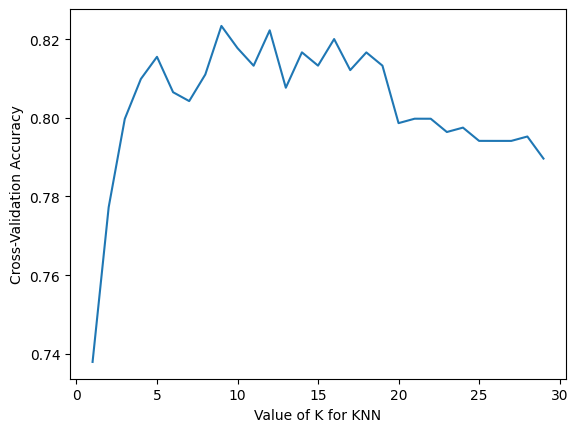

In [46]:
#plotting to see the best knn value

plt.plot(rng, final_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validation Accuracy')

In [47]:
#finding the best k value
np.argmax(final_scores) + 1

9

# Training making final predictions in KNN

In [48]:
knn = KNeighborsClassifier(n_neighbors=9)

In [49]:
knn.fit(X,y)

KNeighborsClassifier(n_neighbors=9)

# final predictions

In [50]:
pred_final = knn.predict(test)
pred_final

array([0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 1., 0., 1., 1., 0.,
       0., 0., 1., 0., 1., 1., 1., 1., 0., 1., 0., 1., 0., 0., 0., 1., 0.,
       1., 0., 0., 1., 0., 1., 0., 1., 0., 1., 1., 0., 0., 0., 1., 1., 1.,
       0., 1., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 1., 1., 0.,
       0., 1., 1., 0., 0., 1., 1., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0.,
       0., 1., 1., 1., 1., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 0., 0., 1., 0.,
       1., 1., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0.,
       0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0.,
       1., 0., 0., 1., 1., 0., 1., 1., 0., 1., 0., 0., 1., 0., 0., 1., 1.,
       0., 0., 0., 0., 0., 1., 1., 0., 1., 1., 0., 1., 1., 0., 1., 0., 1.,
       0., 0., 0., 0., 1., 1., 0., 1., 0., 1., 1., 0., 1., 1., 1., 1., 1.,
       0., 0., 1., 0., 1., 0., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0., 1.,
       0., 1., 0., 1., 1.

In [51]:
pred_final_df = pd.DataFrame(pred_final, columns=['Survived'])
pred_final_df.value_counts()

Survived
0.0         255
1.0         163
dtype: int64

In [52]:
test['Survived'] = pred_final_df['Survived'].astype('int')

In [53]:
test['PassengerId'] = pid.astype('int')

In [54]:
test.dtypes

Pclass           float64
Sex              float64
Age              float64
Embarked         float64
FamilySize       float64
FarePerPerson    float64
Title            float64
Survived           int64
PassengerId        int64
dtype: object

In [55]:
submission = test[['PassengerId', 'Survived']]
submission.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 0 to 417
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   PassengerId  418 non-null    int64
 1   Survived     418 non-null    int64
dtypes: int64(2)
memory usage: 9.8 KB


In [56]:
submission.to_csv('submission.csv', index=False)

# Another Testing 

In [57]:
# read data
data = pd.read_csv('/kaggle/input/titanic/train.csv')
test_data = pd.read_csv('/kaggle/input/titanic/test.csv')

In [58]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [62]:
X = data.iloc[:, 2:]
y = data.iloc[:, 1].values


In [63]:
X.isnull().sum()

Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [64]:
# training data droping non required data
X.drop(['Name', 'Cabin', 'Ticket'], axis=1, inplace=True)
# testing data droping non required data
test_data.drop(['PassengerId','Name', 'Cabin', 'Ticket'], axis=1, inplace=True)

In [65]:
X.head(5)

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,22.0,1,0,7.2500,S
1,1,female,38.0,1,0,71.2833,C
2,3,female,26.0,0,0,7.9250,S
3,1,female,35.0,1,0,53.1000,S
4,3,male,35.0,0,0,8.0500,S


In [66]:
# Label Encode by creating dummies variables
X = pd.get_dummies(X)

test_data = pd.get_dummies(test_data)

In [67]:
X.head(5)

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,22.0,1,0,7.2500,0,1,0,0,1
1,1,38.0,1,0,71.2833,1,0,1,0,0
2,3,26.0,0,0,7.9250,1,0,0,0,1
3,1,35.0,1,0,53.1000,1,0,0,0,1
4,3,35.0,0,0,8.0500,0,1,0,0,1


In [68]:
# Imputing Nan values using KNN Imputer
from sklearn.impute import KNNImputer
imp = KNNImputer(n_neighbors=5)
X = imp.fit_transform(X)

test_data = imp.transform(test_data)

In [69]:
# Feature Scaling to train data on Artificial Neural Networks
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

test_data = sc.transform(test_data)

In [70]:
#### Training Testing Split
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, random_state=1)

In [71]:
# Create neural network
ann = tf.keras.models.Sequential()

# create input layer
ann.add(tf.keras.layers.Dense(units=5, activation='relu'))

# add hidden layer
ann.add(tf.keras.layers.Dense(units=10, activation='relu'))
ann.add(tf.keras.layers.Dense(units=10, activation='relu'))

# create output layer
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

# Compile the network with stochastic gradient descent
ann.compile(optimizer= 'adam', loss= 'binary_crossentropy', metrics=['accuracy'])

# Train the network
ann.fit(xtrain, ytrain, batch_size=20, epochs=100)

Epoch 1/100
36/36 [==============================] - 1s 2ms/step - loss: 0.7157 - accuracy: 0.5253
Epoch 2/100
36/36 [==============================] - 0s 2ms/step - loss: 0.6795 - accuracy: 0.6222
Epoch 3/100
36/36 [==============================] - 0s 2ms/step - loss: 0.6540 - accuracy: 0.6222
Epoch 4/100
36/36 [==============================] - 0s 2ms/step - loss: 0.6315 - accuracy: 0.6222
Epoch 5/100
36/36 [==============================] - 0s 2ms/step - loss: 0.6055 - accuracy: 0.6250
Epoch 6/100
36/36 [==============================] - 0s 2ms/step - loss: 0.5799 - accuracy: 0.6461
Epoch 7/100
36/36 [==============================] - 0s 2ms/step - loss: 0.5534 - accuracy: 0.6938
Epoch 8/100
36/36 [==============================] - 0s 2ms/step - loss: 0.5257 - accuracy: 0.7626
Epoch 9/100
36/36 [==============================] - 0s 2ms/step - loss: 0.4997 - accuracy: 0.7865
Epoch 10/100
36/36 [==============================] - 0s 2ms/step - loss: 0.4766 - accuracy: 0.8034
Epoch 11/

In [72]:
ypred = ann.predict(xtest)

ypred = (ypred > 0.5)

ypred = ypred.reshape(len(ypred),)

6/6 [==============================] - 0s 2ms/step


In [73]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
ypred = le.fit_transform(ypred)

In [74]:
from sklearn.metrics import accuracy_score
accuracy_score(ytest, ypred)

0.770949720670391

In [75]:
ypred = ann.predict(test_data)

14/14 [==============================] - 0s 1ms/step


In [76]:
ypred = (ypred > 0.5)

ypred = ypred.reshape(len(ypred),)

le = LabelEncoder()
ypred = le.fit_transform(ypred)

In [77]:
output = pd.DataFrame({'PassengerId': range(892, 1310),
                       'Survived': ypred})
output.to_csv('submission.csv', index=False)